In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pandas as pd
import warnings;
warnings.filterwarnings('ignore')

In [2]:
# Plotting settings
from matplotlib import gridspec, rc
from matplotlib import ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns

rc('text', usetex = True)
rc('font', family = 'serif')
TITLE_SIZE = 30
LABEL_SIZE = 25
LEGEND_TITLE_SIZE = 27
LEGEND_SIZE = 22
TICK_SIZE = 20
FONT = 'serif'
params = {}
params['legend.title_fontsize'] = LEGEND_TITLE_SIZE
params['axes.labelsize'] = LABEL_SIZE
params['axes.titlesize'] = TITLE_SIZE
params['legend.fontsize'] = LEGEND_SIZE
params["xtick.labelsize"]= TICK_SIZE
params["ytick.labelsize"] = TICK_SIZE
params["font.family"] = "Times New Roman"
context = sns.plotting_context("paper", rc=params)
sns.set_theme(style="whitegrid", font=FONT)

### MovieLens Descriptive plots

In [3]:
## Load MovieLens 1M historical data
rating_df = pd.read_csv(os.path.join('results', 'ml1m_ratings.csv'))

# user_aggregates
user_df = rating_df.groupby('user_id') \
                .agg({'item_id':'count', 'rating':'mean', 'gender':'first'}) \
                .rename(columns={'item_id':'count','rating':'meanrating'}) \
                .reset_index()

# item aggregates
item_df = rating_df.groupby('item_id') \
                .agg({'user_id':'count', 'rating':'mean'}) \
                .rename(columns={'user_id':'count','rating':'meanrating'}) \
                .reset_index()

In [5]:
print('{:.3f}% of the users are female'.format(100*len(user_df[user_df['gender']=='Female'])/len(user_df)))

28.295% of the users are female


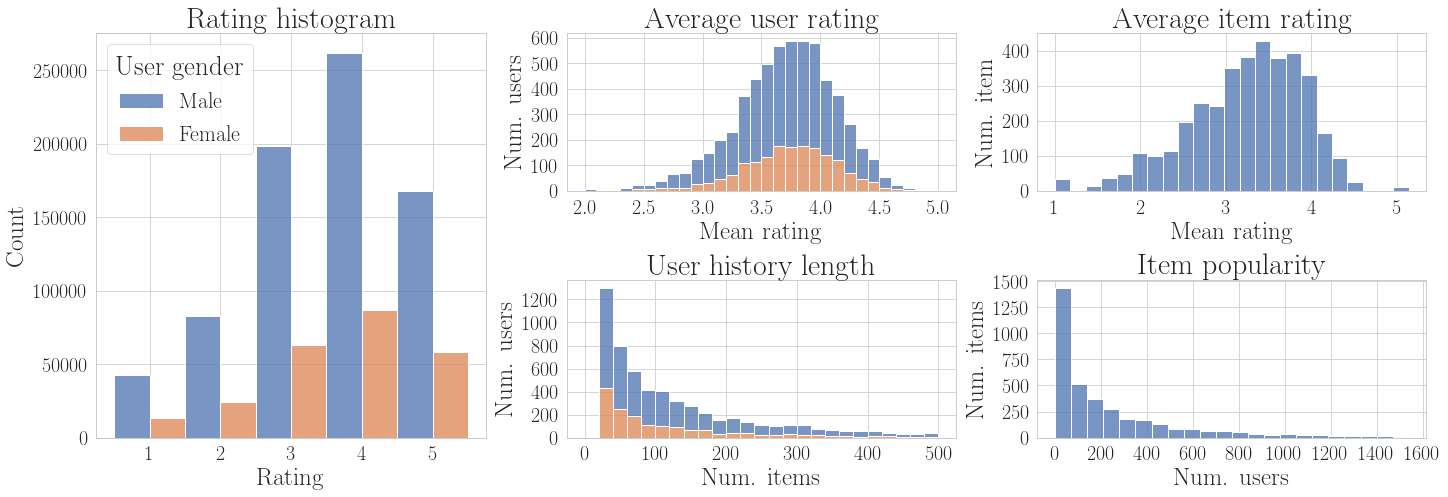

In [6]:
with context:
    fig = plt.figure(constrained_layout=True, figsize=(20, 7))
    gs = fig.add_gridspec(nrows=2, ncols=3)
    big_ax = fig.add_subplot(gs[:, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, 2])
    sns.histplot(x = 'rating',hue = 'gender', discrete= True,palette='deep', data = rating_df,
                 hue_order = ['Male', 'Female'], legend= True,
                 multiple='dodge', linewidth=1, ax=big_ax)
    big_ax.get_legend().set_title('User gender')
    big_ax.set_title('Rating histogram')
    big_ax.set_xlabel('Rating')
    sns.histplot(x = 'meanrating',hue = 'gender', multiple='stack', binwidth = 0.1, binrange=(2,5),
             data = user_df, hue_order = ['Male', 'Female'], palette='deep', linewidth=1, ax = ax1, legend = False)
    ax1.set_xlabel('Mean rating')
    ax1.set_ylabel('Num. users')
    ax1.set_title('Average user rating')
    sns.histplot(x = 'count',hue = 'gender', multiple='stack', binwidth = 20,
             data = user_df, hue_order = ['Male', 'Female'], linewidth=1, binrange=(0, 500), palette='deep', ax = ax2, legend = False)
    ax2.set_xlabel('Num. items')
    ax2.set_ylabel('Num. users')
    ax2.set_title('User history length')
    sns.histplot(x = 'meanrating', binwidth = 0.18,data = item_df,palette='deep', linewidth=1, ax = ax3)
    ax3.set_xlabel('Mean rating')
    ax3.set_ylabel('Num. item')
    ax3.set_title('Average item rating')
    sns.histplot(x = 'count', binwidth = 70,data = item_df, linewidth=1, binrange=(0,1500), palette='deep', ax = ax4)
    ax4.set_xlabel('Num. users')
    ax4.set_ylabel('Num. items')
    ax4.set_title('Item popularity')
    plt.tight_layout()

plt.show()
    

In [6]:
# fig.savefig('ml1m_descriptive.pdf', dpi = 100)

## LastFM descriptive plots

In [7]:
## Load LastFM 1M historical data
rating_df = pd.read_csv(os.path.join('results', 'lastfm_ratings.csv'))

# user_aggregates
user_df = rating_df.groupby('user_id') \
                .agg({'item_id':'count', 'rating':'mean'}) \
                .rename(columns={'item_id':'count','rating':'meanrating'}) \
                .reset_index()

# item aggregates
item_df = rating_df.groupby('item_id') \
                .agg({'user_id':'count', 'rating':'mean', 'strict_gender':'first'}) \
                .rename(columns={'user_id':'count','rating':'meanrating', 'strict_gender':'gender'}) \
                .reset_index()
item_df['gender'] = item_df.apply(lambda x: x['gender'] if not pd.isna(x['gender']) else 'Unknown', axis = 1)

In [10]:
print('{:.3f}% of the artists are female'.format(100*len(item_df[item_df['gender']=='Female'])/len(item_df)))
print('{:.3f}% of the artists are mixed'.format(100*len(item_df[item_df['gender']=='Mixed'])/len(item_df)))
print('{:.3f}% of the artists are male'.format(100*len(item_df[item_df['gender']=='Male'])/len(item_df)))
print('{:.3f}% of the artists are unknown'.format(100*len(item_df[item_df['gender']=='Unknown'])/len(item_df)))

6.524% of the artists are female
3.312% of the artists are mixed
35.775% of the artists are male
54.389% of the artists are unknown


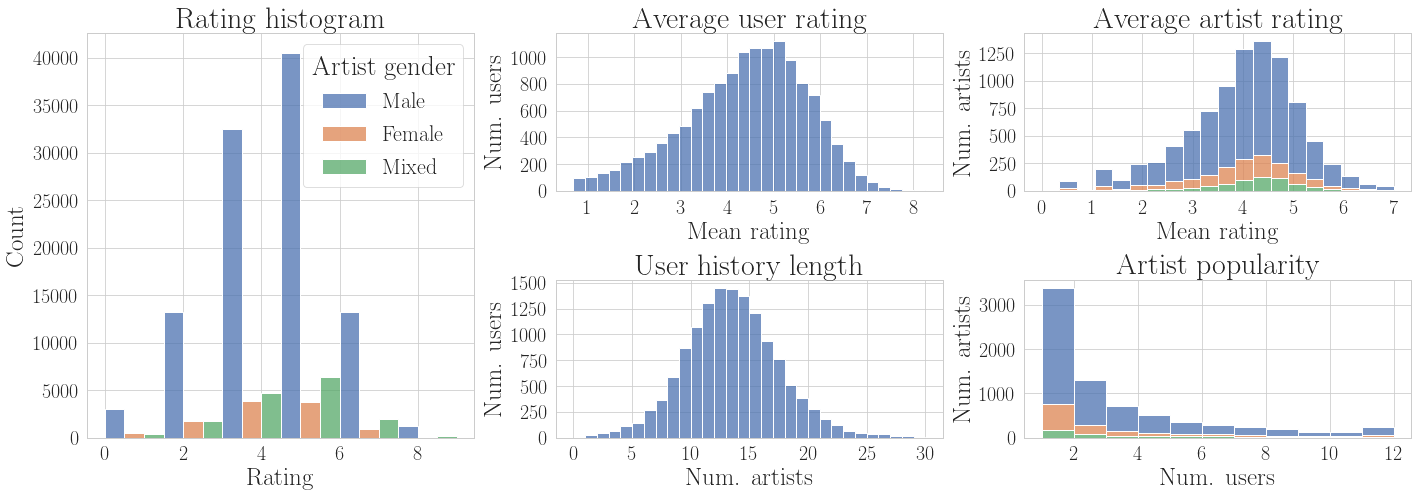

In [11]:
with context:
    fig = plt.figure(constrained_layout=True, figsize=(20, 7))
    gs = fig.add_gridspec(nrows=2, ncols=3)
    big_ax = fig.add_subplot(gs[:, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, 2])
    sns.histplot(x = 'rating',hue = 'strict_gender',palette='deep', binwidth = 1.5, data = rating_df, binrange=(0,9),
                 hue_order = ['Male', 'Female', 'Mixed'],multiple='dodge', linewidth=1, ax=big_ax)
    big_ax.get_legend().set_title('Artist gender')
    big_ax.set_title('Rating histogram')
    big_ax.set_xlabel('Rating')
    sns.histplot(x = 'meanrating',palette='deep', bins = 30,data = user_df, linewidth=1, ax = ax1, legend = False)
    ax1.set_xlabel('Mean rating')
    ax1.set_ylabel('Num. users')
    ax1.set_title('Average user rating')
    sns.histplot(x = 'count', bins = 30,palette='deep', data = user_df, linewidth=1, binrange=(0,30), ax = ax2, legend = False)
    ax2.set_xlabel('Num. artists')
    ax2.set_ylabel('Num. users')
    ax2.set_title('User history length')
    sns.histplot(x = 'meanrating', bins = 20,palette='deep',data = item_df,  
                 hue_order = ['Male', 'Female', 'Mixed'],
                 hue = 'gender', multiple='stack', linewidth=1, ax = ax3, binrange = (0,7), legend=False)
    ax3.set_xlabel('Mean rating')
    ax3.set_ylabel('Num. artists')
    ax3.set_title('Average artist rating')
    sns.histplot(x = 'count',data = item_df,palette='deep', binwidth=1, linewidth=1,
                 hue_order = ['Male', 'Female', 'Mixed'],
                 hue = 'gender', multiple='stack', binrange=(1,12), ax = ax4, legend=False)
    ax4.set_xlabel('Num. users')
    ax4.set_ylabel('Num. artists')
    ax4.set_title('Artist popularity')
    plt.tight_layout()

plt.show()

In [10]:
# fig.savefig('lastfm_descriptive.pdf', dpi = 100)

## MIND descriptive plots

In [12]:
## Load MIND historical data
rating_df = pd.read_csv(os.path.join('results', 'mind_ratings.csv'))
news_df = pd.read_csv(os.path.join('results', 'mind_news.csv'))
news_groups = news_df.groupby(['Category'])

In [13]:
# user_aggregates
user_df = rating_df.groupby('user_id') \
                .agg({'item_id':'count', 'rating':'mean'}) \
                .rename(columns={'item_id':'count','rating':'meanrating'}) \
                .reset_index()

# item aggregates
item_df = rating_df.groupby('item_id') \
                .agg({'user_id':'count', 'rating':'mean'}) \
                .rename(columns={'user_id':'count','rating':'meanrating'}) \
                .reset_index()

user_df['clicks'] = user_df.apply(
    lambda x: 'No clicks' if x['meanrating'] <= np.log(2) + 10**(-10) else 'Has clicks', axis=1)
rating_df['clicks'] = rating_df.apply(
    lambda x: 'No clicks' if x['rating'] <= np.log(2) + 10**(-10) else 'Has clicks', axis=1)
item_df['clicks'] = item_df.apply(
    lambda x: 'No clicks' if x['meanrating'] <= np.log(2) + 10**(-2) else 'Has clicks', axis=1)

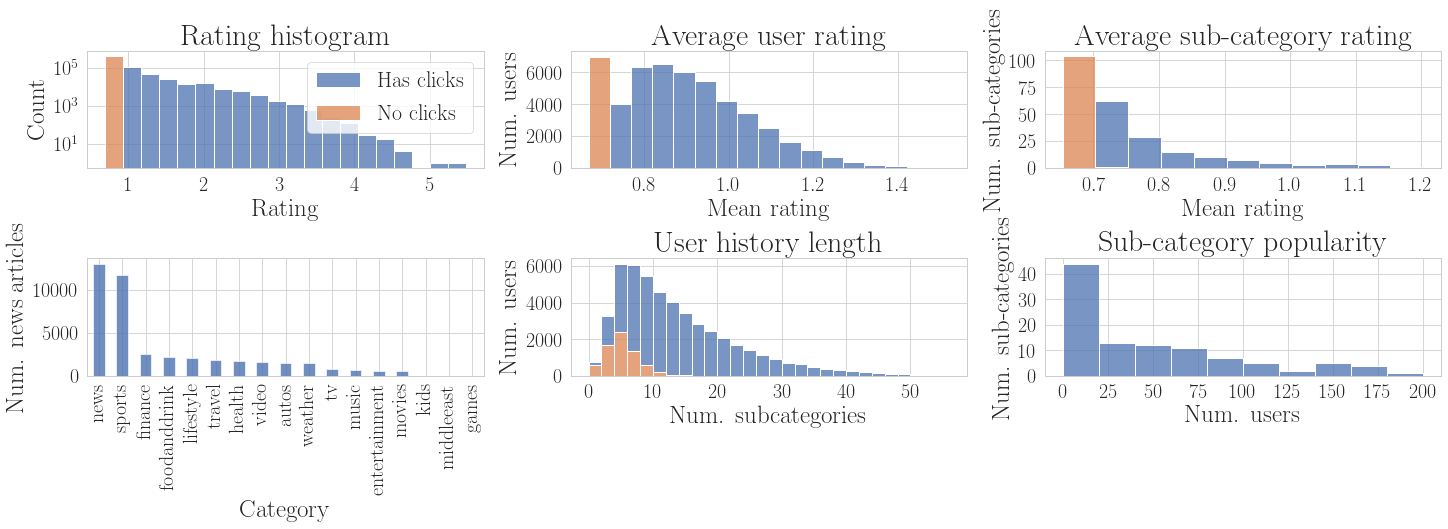

In [14]:
with context:
    fig = plt.figure(constrained_layout=True, figsize=(20, 7))
    gs = fig.add_gridspec(nrows=2, ncols=3)
    big_ax = fig.add_subplot(gs[0, 0])
    ax0 = fig.add_subplot(gs[1, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, 2])
    sns.histplot(x = 'rating', bins = 20, data = rating_df, multiple = 'stack', palette='deep',
                 hue = 'clicks', hue_order = ['Has clicks','No clicks'], linewidth=1, ax=big_ax)
    big_ax.set_yscale('log')
    big_ax.set_title('Rating histogram')
    big_ax.set_xlabel('Rating')
    big_ax.get_legend().set_title('')
    
    cat_info = news_groups.size().sort_values(ascending=False)
    cat_info.plot.bar(ax=ax0, color = '#4c72b0', alpha = 0.8)
    ax0.set_ylabel('Num. news articles')
    
    sns.histplot(x = 'meanrating',data = user_df, binwidth = 0.05, palette='deep', binrange = (0.67, 1.5), hue = 'clicks', 
                 multiple = 'stack', linewidth=1, ax = ax1, legend = False)
    ax1.set_xlabel('Mean rating')
    ax1.set_ylabel('Num. users')
    ax1.set_title('Average user rating')
    sns.histplot(x = 'count', data = user_df, binwidth=2, palette='deep', hue = 'clicks', multiple = 'stack',
                 linewidth=1, ax = ax2, binrange=(0,55), legend = False)
    ax2.set_xlabel('Num. subcategories')
    ax2.set_ylabel('Num. users')
    ax2.set_title('User history length')
    sns.histplot(x = 'meanrating',data = item_df, linewidth=1, ax = ax3,  multiple = 'stack', binwidth= 0.05, palette='deep',
                  hue = 'clicks', hue_order = ['Has clicks','No clicks'],legend=False, binrange=(0.653, 1.2))
    ax3.set_xlabel('Mean rating')
    ax3.set_ylabel('Num. sub-categories')
    ax3.set_title('Average sub-category rating')
    sns.histplot(x = 'count',data = item_df, linewidth=1, binrange = (0, 200),  multiple = 'stack', binwidth=20,
                   ax = ax4, palette='deep',legend=False)
    ax4.set_xlabel('Num. users')
    ax4.set_ylabel('Num. sub-categories')
    ax4.set_title('Sub-category popularity')

plt.show()

In [14]:
# fig.savefig('mind_descriptive.pdf', dpi = 100)